# Install packages

In [173]:
install.packages("fmsb", repos = "http://cran.us.r-project.org") 

Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
     binary source needs_compilation
fmsb  0.6.1  0.6.3             FALSE



installing the source package 'fmsb'



# Understanding Source of Data

In [378]:
data(LifeCycleSavings)
help(LifeCycleSavings)

# Load Data

In [379]:
data(LifeCycleSavings)

In [380]:
head(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


In [381]:
nrow(LifeCycleSavings)

[1] 50

# Initial Data Analysis

### Basic Statistics

In [382]:
summary(LifeCycleSavings)

       sr             pop15           pop75            dpi         
 Min.   : 0.600   Min.   :21.44   Min.   :0.560   Min.   :  88.94  
 1st Qu.: 6.970   1st Qu.:26.21   1st Qu.:1.125   1st Qu.: 288.21  
 Median :10.510   Median :32.58   Median :2.175   Median : 695.66  
 Mean   : 9.671   Mean   :35.09   Mean   :2.293   Mean   :1106.76  
 3rd Qu.:12.617   3rd Qu.:44.06   3rd Qu.:3.325   3rd Qu.:1795.62  
 Max.   :21.100   Max.   :47.64   Max.   :4.700   Max.   :4001.89  
      ddpi       
 Min.   : 0.220  
 1st Qu.: 2.002  
 Median : 3.000  
 Mean   : 3.758  
 3rd Qu.: 4.478  
 Max.   :16.710  

### Scatter plot, Variance-covariance matrix, correlation matrix

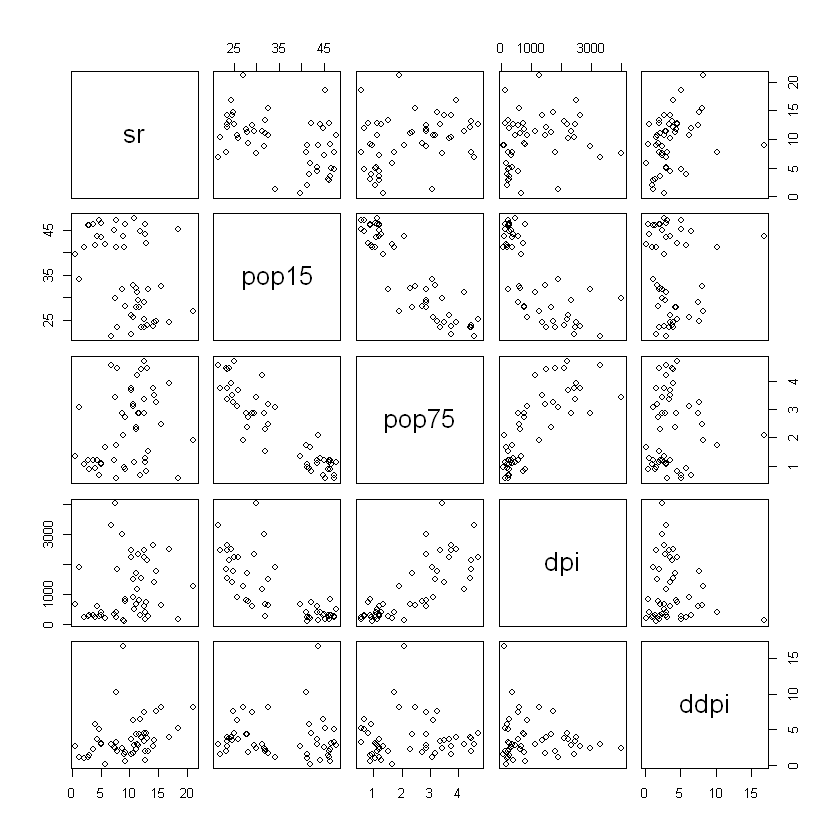

In [383]:
plot(LifeCycleSavings)

In [384]:
cov(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
sr,20.074046,-18.678638,1.83049898,978.2825,3.91901061
pop15,-18.678638,83.754110,-10.73166612,-6857.2360,-1.25610710
pop75,1.830499,-10.731666,1.66609082,1006.5607,0.09379918
dpi,978.282487,-6857.235988,1006.56074980,981821.1551,-368.21350800
ddpi,3.919011,-1.256107,0.09379918,-368.2135,8.23615739


In [385]:
cor(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
sr,1.0000000,-0.45553809,0.31652112,0.2203589,0.30478716
pop15,-0.4555381,1.00000000,-0.90847871,-0.7561881,-0.04782569
pop75,0.3165211,-0.90847871,1.00000000,0.7869995,0.02532138
dpi,0.2203589,-0.75618810,0.78699951,1.0000000,-0.12948552
ddpi,0.3047872,-0.04782569,0.02532138,-0.1294855,1.00000000


- We can see that the variance of `pop75` and `ddpi` seems to be really small, maybe we should visualize their distributions using **Density Estimation**. For the other three variables, we can use **Boxplot**.

- Strong correlation between `pop75` and `ddpi`

### Visualizing distribution of each variable

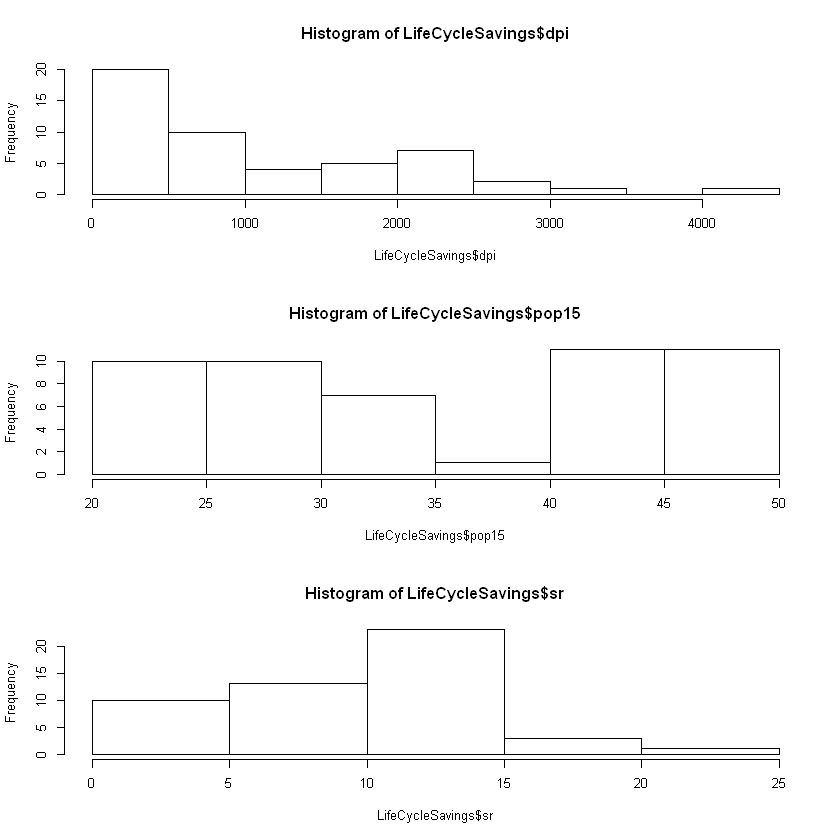

In [386]:
layout(matrix(3:1,ncol=1))
hist(LifeCycleSavings$sr, nclass = 6)
hist(LifeCycleSavings$pop15, nclass = 6)
hist(LifeCycleSavings$dpi, nclass = 6)

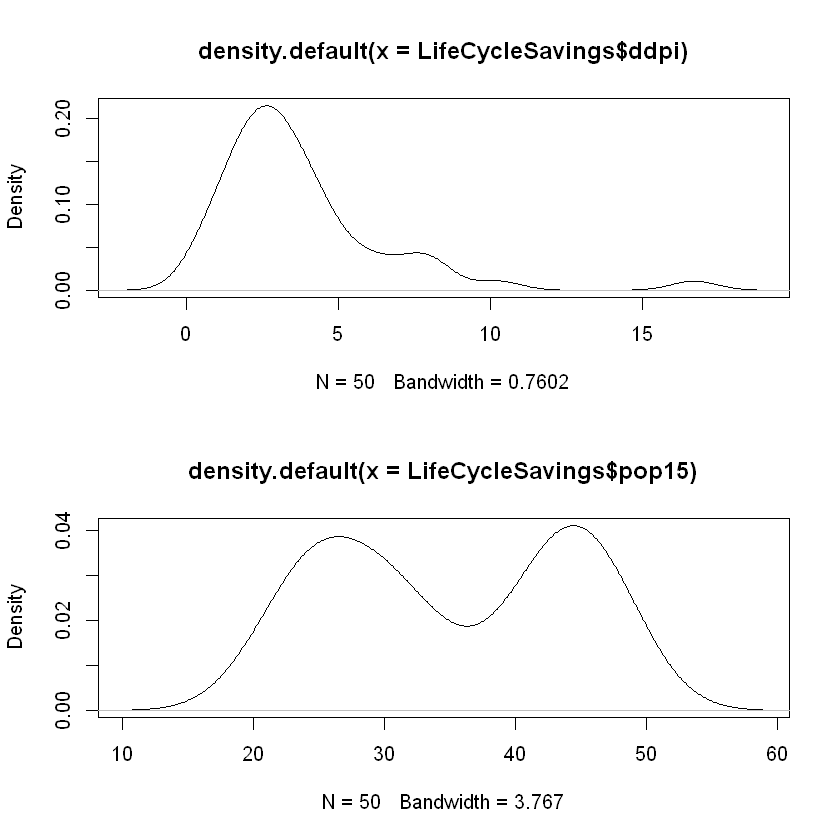

In [387]:
layout(matrix(2:1,ncol=1))
plot(density(LifeCycleSavings$pop15))
plot(density(LifeCycleSavings$ddpi))

### Remove outlier

We found them from models' cook distance. 

In [388]:
row.names(LifeCycleSavings)

[1] "Australia"      "Austria"        "Belgium"        "Bolivia"       
 [5] "Brazil"         "Canada"         "Chile"          "China"         
 [9] "Colombia"       "Costa Rica"     "Denmark"        "Ecuador"       
[13] "Finland"        "France"         "Germany"        "Greece"        
[17] "Guatamala"      "Honduras"       "Iceland"        "India"         
[21] "Ireland"        "Italy"          "Japan"          "Korea"         
[25] "Luxembourg"     "Malta"          "Norway"         "Netherlands"   
[29] "New Zealand"    "Nicaragua"      "Panama"         "Paraguay"      
[33] "Peru"           "Philippines"    "Portugal"       "South Africa"  
[37] "South Rhodesia" "Spain"          "Sweden"         "Switzerland"   
[41] "Turkey"         "Tunisia"        "United Kingdom" "United States" 
[45] "Venezuela"      "Zambia"         "Jamaica"        "Uruguay"       
[49] "Libya"          "Malaysia"

In [389]:
which(rownames(LifeCycleSavings) %in% c("Japan", "Libya", "Jamaica", "Zambia"))

[1] 23 46 47 49

In [390]:
LifeCycleSavings = LifeCycleSavings[-c(23, 46, 47, 49), ] 

In [391]:
# we should find nothing now
which(rownames(LifeCycleSavings) %in% c("Japan", "Libya", "Jamaica", "Zambia"))

integer(0)

### Standardizing explanatory variables

In [392]:
LifeCycleSavings$pop15 <- (LifeCycleSavings$pop15 - mean(LifeCycleSavings$pop15)) / sd(LifeCycleSavings$pop15)
LifeCycleSavings$pop75 <- (LifeCycleSavings$pop75 - mean(LifeCycleSavings$pop75)) / sd(LifeCycleSavings$pop75)
LifeCycleSavings$dpi <- (LifeCycleSavings$dpi - mean(LifeCycleSavings$dpi)) / sd(LifeCycleSavings$dpi)
LifeCycleSavings$ddpi <- (LifeCycleSavings$ddpi - mean(LifeCycleSavings$ddpi)) / sd(LifeCycleSavings$ddpi)

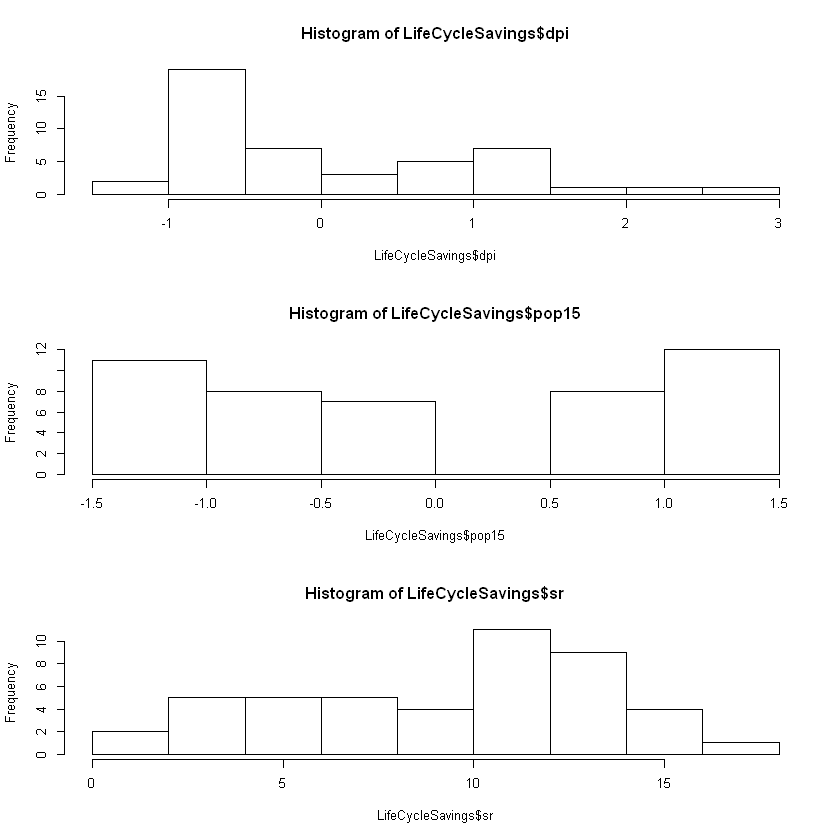

In [393]:
layout(matrix(3:1,ncol=1))
hist(LifeCycleSavings$sr, nclass = 6)
hist(LifeCycleSavings$pop15, nclass = 6)
hist(LifeCycleSavings$dpi, nclass = 6)

### Modeling

In [434]:
models = new.env()
models$default_model = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = LifeCycleSavings)
models$second_order_model = lm(sr ~ (pop15 + ddpi + pop75 + dpi)^2, data = LifeCycleSavings)
models$model_ddpi = lm(sr ~ ddpi+I (ddpi^2), data = LifeCycleSavings)
models$model_pop15 = lm(sr ~ pop15+I (pop15^2), data = LifeCycleSavings)
models$model_dpi = lm(sr ~ dpi+I(dpi^2), data = LifeCycleSavings)
models$model_pop75 = lm(sr ~ pop75+I(pop75^2), data = LifeCycleSavings)
models$model_ddpi_pop15 = lm(sr ~ pop15*ddpi, data = LifeCycleSavings)
models$model_dpi_pop75 = lm(sr ~ pop75*dpi, data = LifeCycleSavings)
models$combined_model = lm(sr ~ dpi + I(dpi^2) + pop15 + pop75, data = LifeCycleSavings)

In [435]:
print(ls.str(models), max.level = 0)

combined_model : List of 12
default_model : List of 12
model_ddpi : List of 12
model_ddpi_pop15 : List of 12
model_dpi : List of 12
model_dpi_pop75 : List of 12
model_pop15 : List of 12
model_pop75 : List of 12
second_order_model : List of 12


In [396]:
summary(models$default_model)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4322 -2.5530  0.0013  1.8719  6.8596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.2887     0.5063  18.346   <2e-16 ***
pop15        -2.4265     1.4355  -1.690   0.0985 .  
pop75        -0.1506     1.4806  -0.102   0.9195    
dpi          -0.5268     0.8506  -0.619   0.5391    
ddpi          1.0918     0.5561   1.963   0.0564 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.434 on 41 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3044 
F-statistic: 5.924 on 4 and 41 DF,  p-value: 0.0007397


Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"

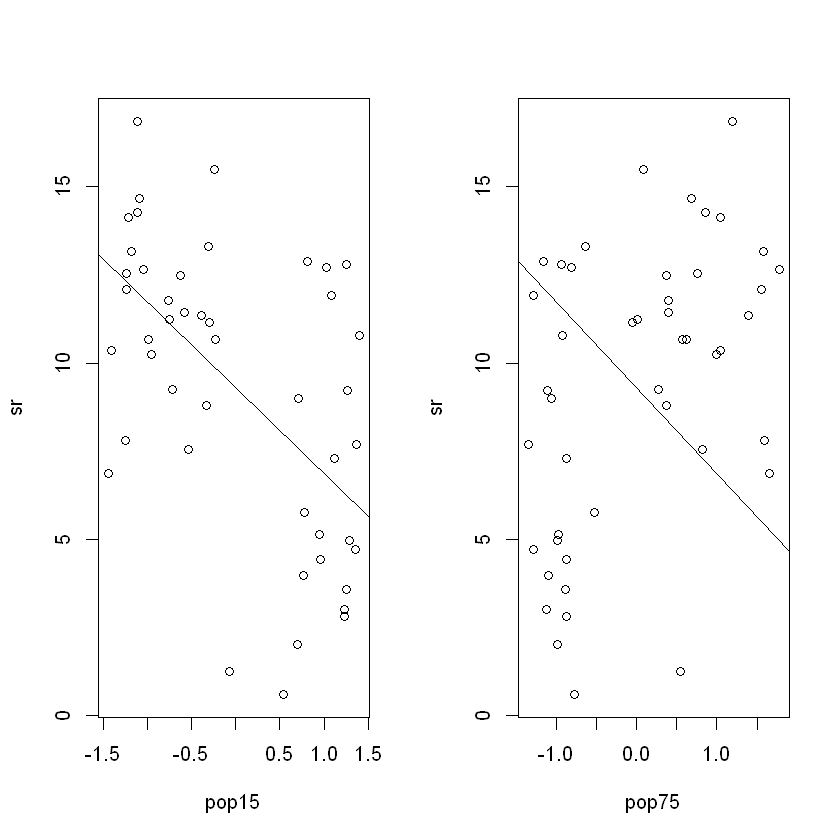

In [397]:
layout(matrix(1:2,ncol=2))
plot(sr ~ pop15, data = LifeCycleSavings)
abline(models$default_model)
plot(sr ~ pop75, data = LifeCycleSavings)
abline(models$default_model)

Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"

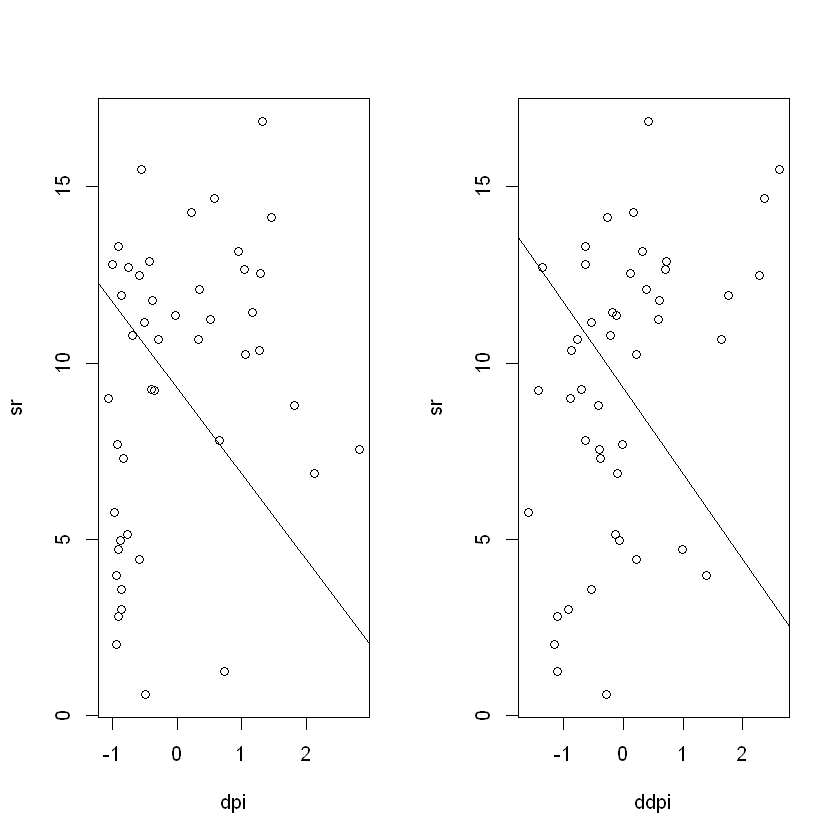

In [398]:
layout(matrix(1:2,ncol=2))
plot(sr ~ dpi, data = LifeCycleSavings)
abline(models$default_model)
plot(sr ~ ddpi, data = LifeCycleSavings)
abline(models$default_model)

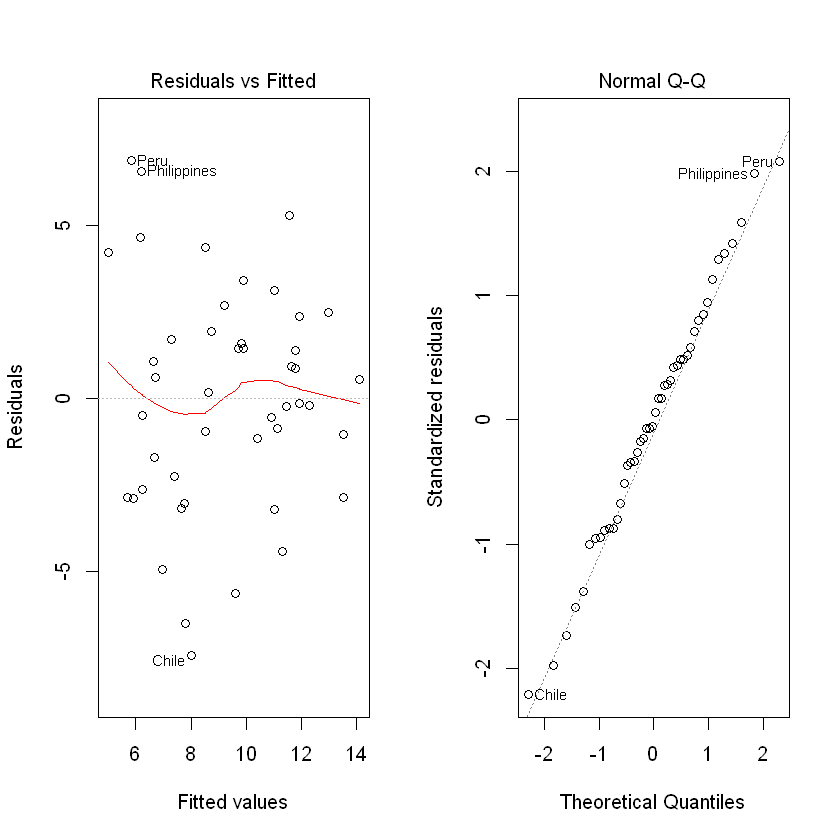

In [399]:
layout(matrix(1:2,ncol=2))
plot(models$default_model, which = 1)
plot(models$default_model, which = 2)

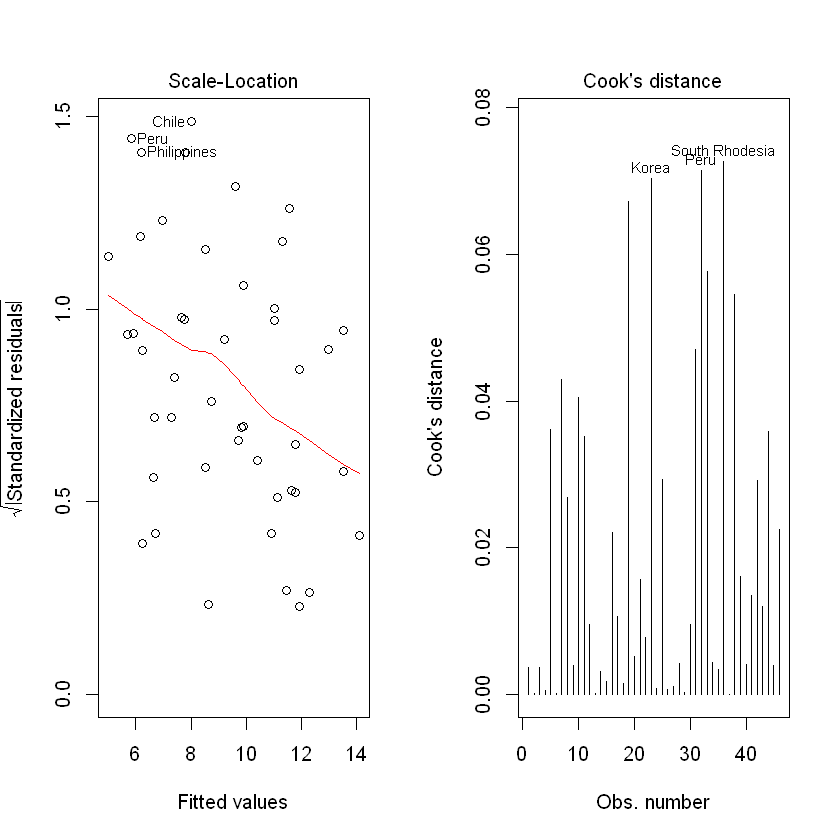

In [400]:
layout(matrix(1:2,ncol=2))
plot(models$default_model, which = 3)
plot(models$default_model, which = 4)

- Zambia, Jamaica, Japan and Libya could be **outliers**.

- The threshold for cook's distance is 4/(46 - 4 - 1) which is around 0.098 

In [401]:
# Inspect for collinearity
fmsb::VIF(models$default_model)

[1] 1.577928

In [402]:
summary(models$model_ddpi_pop15)


Call:
lm(formula = sr ~ pop15 * ddpi + pop75 + dpi, data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4064 -2.2195 -0.0327  2.1236  6.3490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.1558     0.5314  17.230   <2e-16 ***
pop15        -2.4921     1.4423  -1.728   0.0917 .  
ddpi          1.1058     0.5582   1.981   0.0545 .  
pop75        -0.3429     1.5026  -0.228   0.8207    
dpi          -0.3565     0.8765  -0.407   0.6864    
pop15:ddpi   -0.5303     0.6223  -0.852   0.3992    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.445 on 40 degrees of freedom
Multiple R-squared:  0.3776,	Adjusted R-squared:  0.2998 
F-statistic: 4.853 on 5 and 40 DF,  p-value: 0.001461


Warning message in abline(models$model_ddpi_pop15):
"only using the first two of 6 regression coefficients"Warning message in abline(models$model_ddpi_pop15):
"only using the first two of 6 regression coefficients"

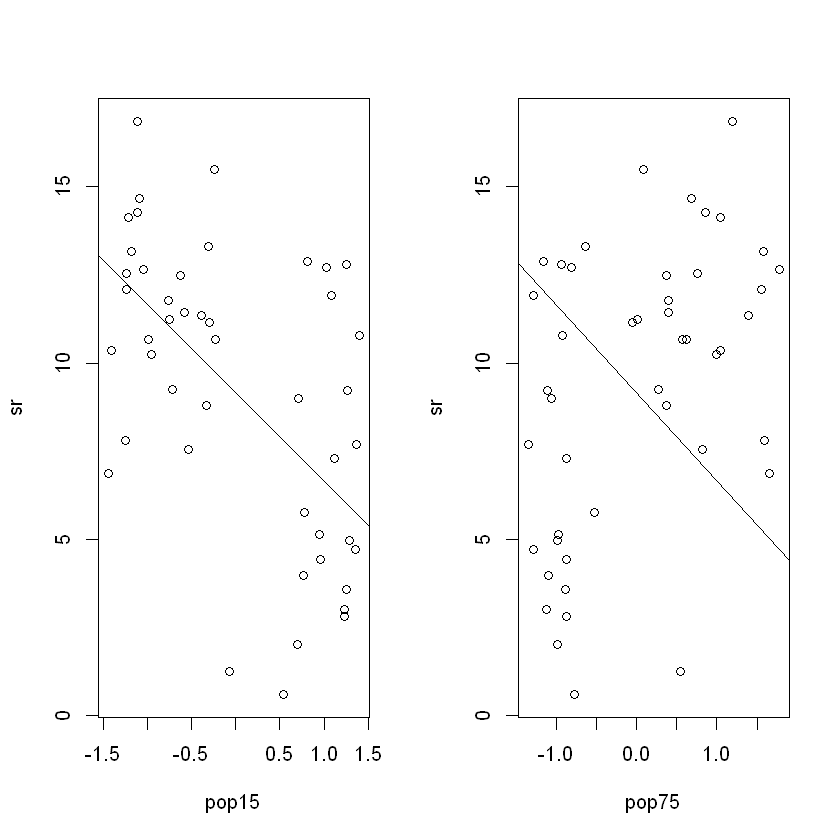

In [403]:
layout(matrix(1:2,ncol=2))
plot(sr ~ pop15, data = LifeCycleSavings)
abline(models$model_ddpi_pop15)
plot(sr ~ pop75, data = LifeCycleSavings)
abline(models$model_ddpi_pop15)

Warning message in abline(models$model_ddpi_pop15):
"only using the first two of 6 regression coefficients"Warning message in abline(models$model_ddpi_pop15):
"only using the first two of 6 regression coefficients"

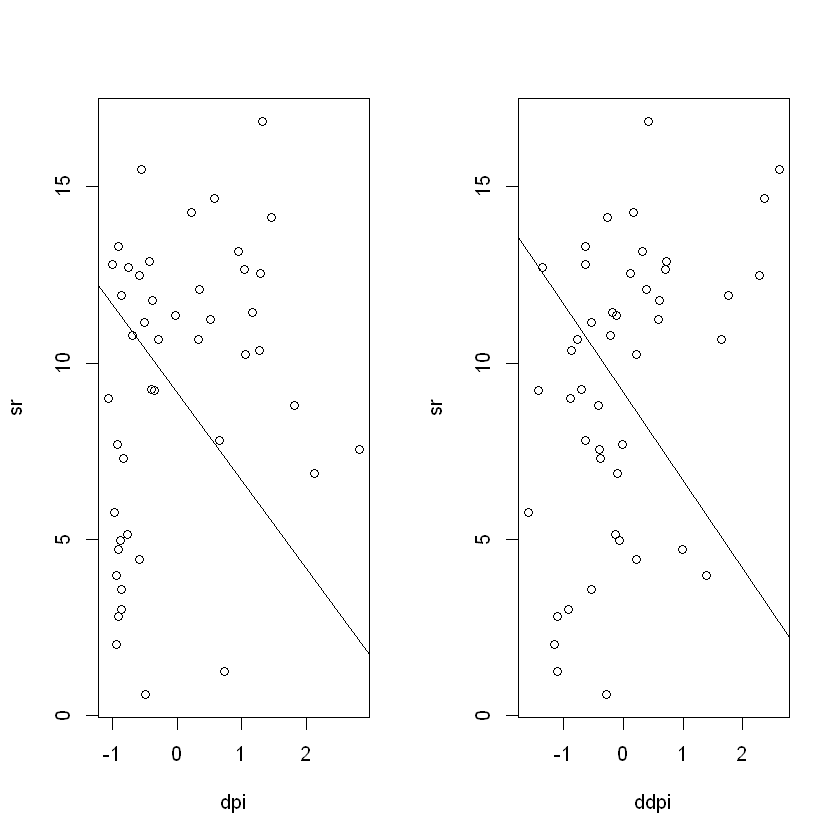

In [404]:
layout(matrix(1:2,ncol=2))
plot(sr ~ dpi, data = LifeCycleSavings)
abline(models$model_ddpi_pop15)
plot(sr ~ ddpi, data = LifeCycleSavings)
abline(models$model_ddpi_pop15)

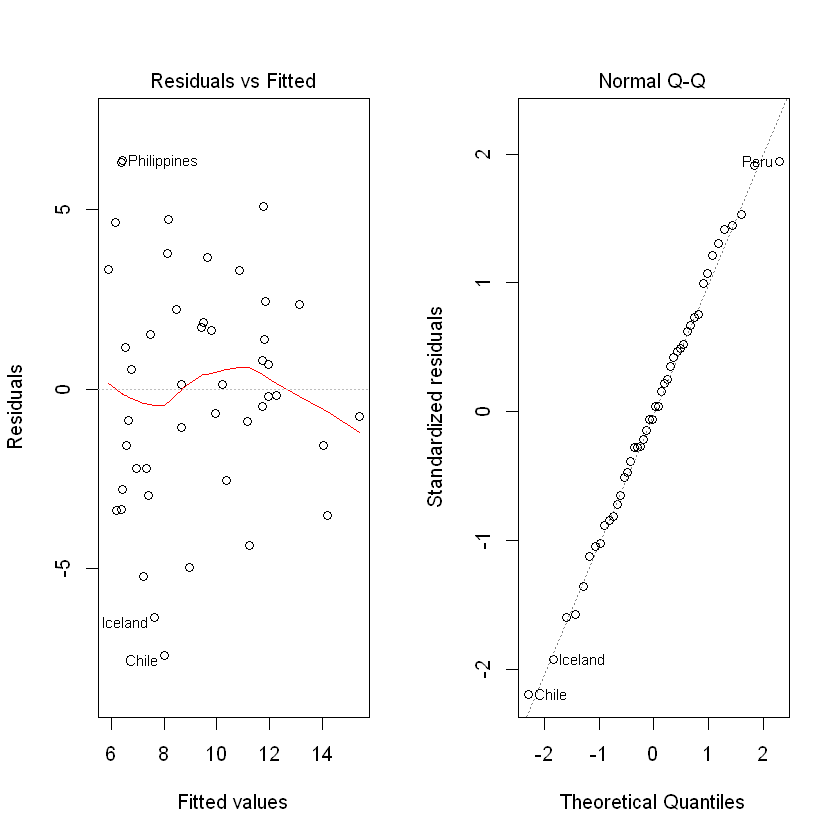

In [405]:
layout(matrix(1:2,ncol=2))
plot(models$model_ddpi_pop15, which = 1)
plot(models$model_ddpi_pop15, which = 2)

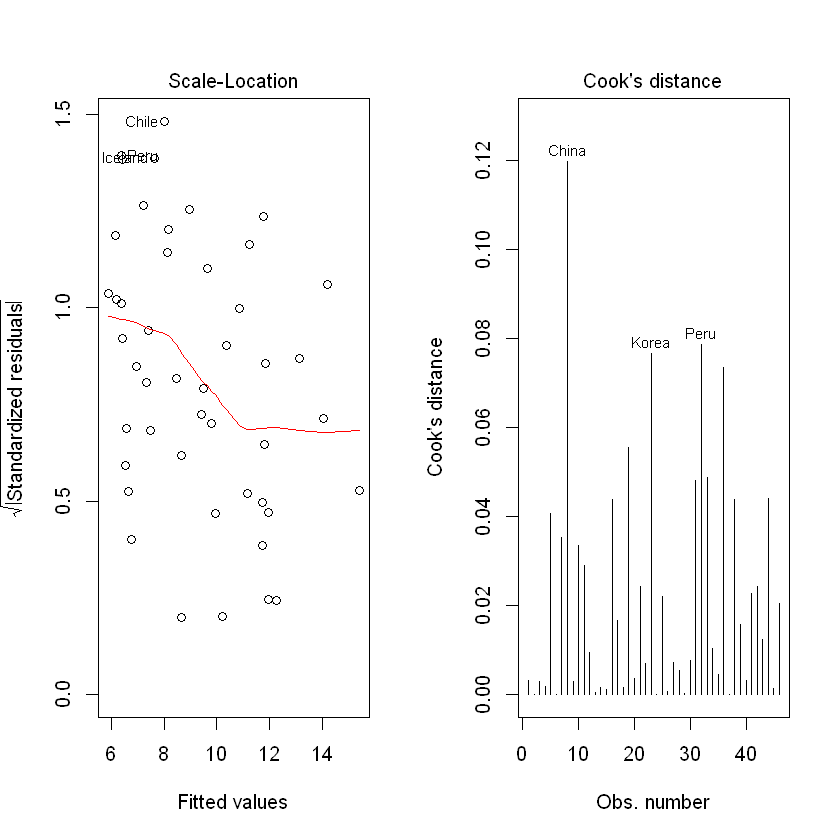

In [406]:
layout(matrix(1:2,ncol=2))
plot(models$model_ddpi_pop15, which = 3)
plot(models$model_ddpi_pop15, which = 4)

In [419]:
summary(models$model_ddpi)


Call:
lm(formula = sr ~ ddpi + I(ddpi^2), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2754 -2.1784  0.9943  2.5288  6.7332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.3948     0.7216  13.020   <2e-16 ***
ddpi          1.7779     0.7015   2.534    0.015 *  
I(ddpi^2)    -0.1085     0.4569  -0.237    0.813    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.842 on 43 degrees of freedom
Multiple R-squared:  0.1679,	Adjusted R-squared:  0.1292 
F-statistic: 4.339 on 2 and 43 DF,  p-value: 0.01921


In [421]:
summary(models$model_pop15)


Call:
lm(formula = sr ~ pop15 + I(pop15^2), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8713 -2.2714  0.4136  2.0093  6.0543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.9733     0.9957   9.012 1.84e-11 ***
pop15        -2.1989     0.5366  -4.098 0.000181 ***
I(pop15^2)    0.3224     0.8639   0.373 0.710827    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.571 on 43 degrees of freedom
Multiple R-squared:  0.2811,	Adjusted R-squared:  0.2476 
F-statistic: 8.405 on 2 and 43 DF,  p-value: 0.0008297


In [433]:
summary(models$model_dpi)


Call:
lm(formula = sr ~ dpi + I(dpi^2), data = LifeCycleSavings)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4156  -2.5314   0.1593   2.5082   6.6158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.6525     0.7802  13.653  < 2e-16 ***
dpi           2.4307     0.7525   3.230  0.00237 ** 
I(dpi^2)     -1.3941     0.5595  -2.491  0.01666 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.771 on 43 degrees of freedom
Multiple R-squared:  0.1985,	Adjusted R-squared:  0.1612 
F-statistic: 5.324 on 2 and 43 DF,  p-value: 0.008596


In [428]:
summary(models$model_pop75)


Call:
lm(formula = sr ~ pop75 + I(pop75^2), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5996 -2.7903  0.3051  2.2306  6.1777 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.9788     0.9111  10.953 5.07e-14 ***
pop75         2.0075     0.5810   3.455  0.00125 ** 
I(pop75^2)   -0.7055     0.7429  -0.950  0.34763    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.726 on 43 degrees of freedom
Multiple R-squared:  0.2174,	Adjusted R-squared:  0.181 
F-statistic: 5.972 on 2 and 43 DF,  p-value: 0.005143
